In [23]:
import pandas as pd
import matplotlib.pyplot as plt

LOG_FILE = "../../chunk_upload_log.csv"

df = pd.read_csv(LOG_FILE)

In [ ]:
agg = (
    df
    .groupby(['file_name', 'chunk_duration'])
    .agg(
        avg_total_time=('total_time', 'mean'),
        worst_chunk_time=('max_chunk_time', 'max')
    )
    .reset_index()
)

file_names = agg['file_name'].unique()
colors = plt.cm.get_cmap('tab10', len(file_names))

/var/folders/w5/plv7t2cx03b39g98cdkhqmq80000gn/T/ipykernel_4618/1412782487.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(file_names))


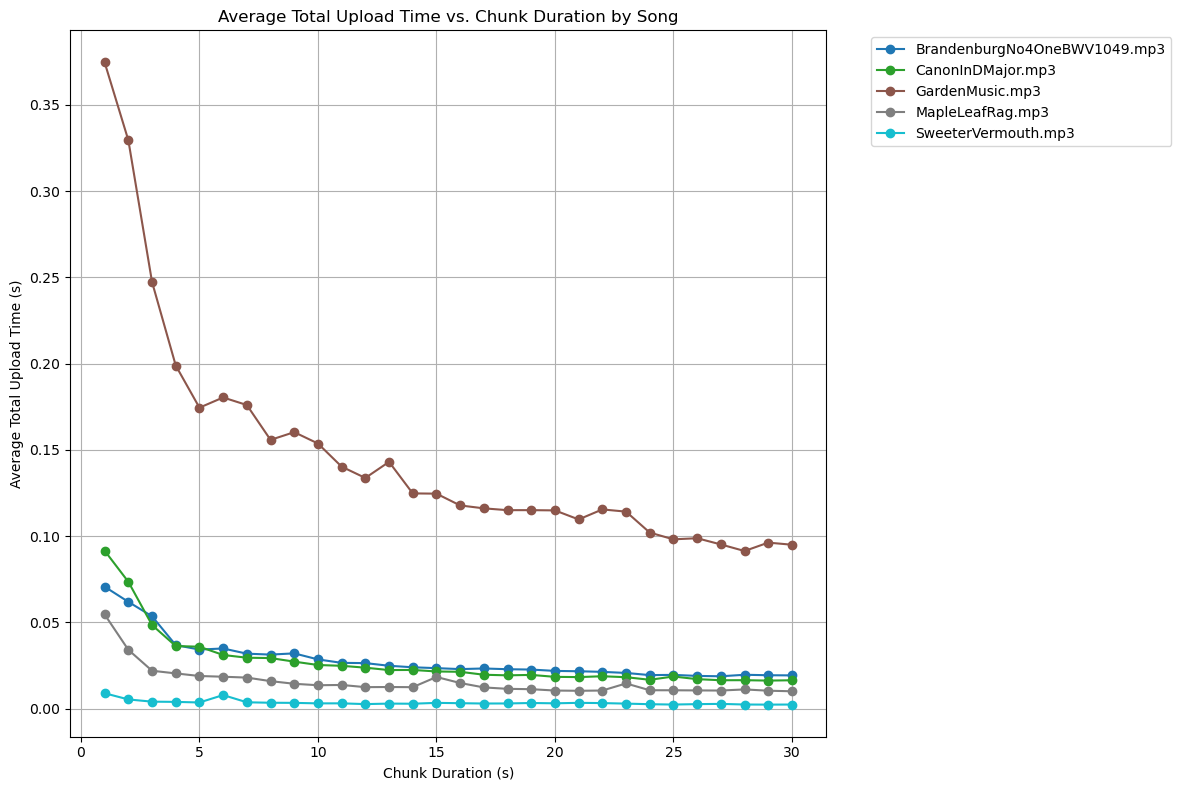

In [28]:
plt.figure(figsize=(12, 8))
for i, fname in enumerate(file_names):
    subset = agg[agg['file_name'] == fname]
    plt.plot(
        subset['chunk_duration'],
        subset['avg_total_time'],
        marker='o',
        linestyle='-',
        label=fname,
        color=colors(i)
    )
plt.xlabel("Chunk Duration (s)")
plt.ylabel("Average Total Upload Time (s)")
plt.title("Average Total Upload Time vs. Chunk Duration by Song")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("avg_total_time_vs_chunk_duration_all_songs.png")
plt.show()

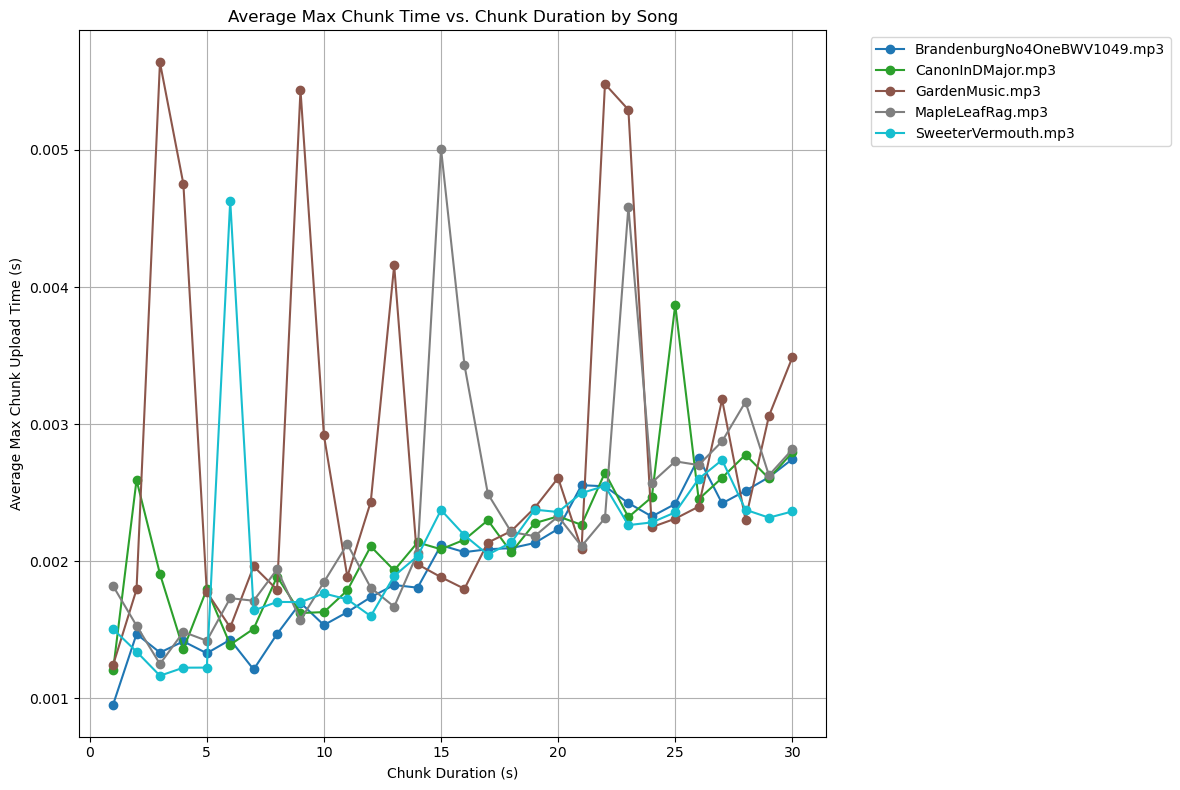

In [29]:
plt.figure(figsize=(12, 8))
for i, fname in enumerate(file_names):
    subset = agg[agg['file_name'] == fname]
    plt.plot(
        subset['chunk_duration'],
        subset['avg_max_chunk_time'],
        marker='o',
        linestyle='-',
        label=fname,
        color=colors(i)
    )
plt.xlabel("Chunk Duration (s)")
plt.ylabel("Average Max Chunk Upload Time (s)")
plt.title("Average Max Chunk Time vs. Chunk Duration by Song")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("avg_max_chunk_time_vs_chunk_duration_all_songs.png")
plt.show()


In [30]:
# 1. Find the index in agg of the minimum avg_total_time per file_name
optimal_idx = agg.groupby("file_name")["avg_total_time"].idxmin()

# 2. Select those rows
optimal_agg = agg.loc[optimal_idx]

# 3. Print out the optimal chunk_duration, avg_total_time, and avg_max_chunk_time
print(optimal_agg[[
    "file_name",
    "chunk_duration",
    "avg_total_time",
    "avg_max_chunk_time"
]])

                        file_name  chunk_duration  avg_total_time  \
26   BrandenburgNo4OneBWV1049.mp3              27        0.018739   
58              CanonInDMajor.mp3              29        0.016238   
87                GardenMusic.mp3              28        0.091345   
119              MapleLeafRag.mp3              30        0.010050   
148           SweeterVermouth.mp3              29        0.002319   

     avg_max_chunk_time  
26             0.002422  
58             0.002604  
87             0.002304  
119            0.002816  
148            0.002319  
